## Задание по 1 и 2 занятиям
## Математический анализ

https://docs.sympy.org/latest/tutorial/intro.html

In [1]:
#Вначале для простоты будем подключать модуль sympy целиком
from sympy import *
%matplotlib inline

### Функции пользователя
#### Задание 1
Описать функцию $f(x,n)=x(x+1)...(x+n-1)(x+n)$, $n>0$, вычислить  $f(6,7)$, $f(x,4)$, $f(y + z,x)$.      

In [2]:
def f(x, n):
    return factorial(x+n)/factorial(x-1)
print(f(6, 7))
x, y, z = symbols("x y z")
display(simplify(f(x, 4)))
display(f((y+z), x))

51891840


x*(x + 1)*(x + 2)*(x + 3)*(x + 4)

factorial(x + y + z)/factorial(y + z - 1)

#### Задание 2
Описать функцию $right\_ratio(f, x, delta\_x)$, вычисляющую правое разностное отношение функции $f$ в точке $x$ при $\Delta x$, т.е. $\frac{f(x+\Delta x)-f(x)}{\Delta x}$. 

Аргумент $ delta\_x$ по умолчанию равен 1.

Вычислить правое разностное отношение $\sin$ в точке $\frac{\pi}{4}$ со значением $\Delta x$ равным  $\frac{\pi}{6}$ 

и правое разностное отношение $e^x$ при $x=3$ со значением $\Delta x$  по умолчанию. Для вычисления $e^x$ воспользоваться функцией Sympy $\exp(x)$.

In [4]:
def right_ratio(f, x, delta_x = 1):
    return (f(x+delta_x)-f(x))/delta_x
display(simplify(right_ratio(sin, pi/4, pi/6)))
display(right_ratio(exp, 3))

3*(-sqrt(2) + sqrt(6))/(2*pi)

-exp(3) + exp(4)

#### Задание 3
Опиcать функцию $square\_roots$, возвращающую корни квадратного уравнения $a x^2 + bx + c = 0$  с вещественными аргументами $a\neq 0$, b, c и  необязательным параметром $is\_real$, по умолчанию равным $True$. Функция возвращает список корней уравнения. Если корни комплексные, а $is\_real=True$, то функция возвращает пустой список. Если корень один, то в списке корней он тоже должен быть один.

Решить уравнения в вещественных числах:

а) $3x^2+8x+4=0$, 

б) $x^2-4x+4=0$

в) $2x^2+x+1=0$

Уравнение в) решить отдельно в комплексных числах.

Для красивого представления комплексных чисел можно воспользоваться функцией display.

Если элементы списка нужно выводить в столбик, можно воспользоваться display(\*имя_списка) (\* в данном случае служебный символ)

In [6]:
def square_roots(a, b, c, is_real=True):
    D = b**2-4*a*c
    if is_real:
        if D < 0: return []
    if D == 0:
        return -b/(2*a)
    return [(-b+sqrt(D))/(2*a), (-b-sqrt(D))/(2*a)]
print("а)", square_roots(3,8,4))
print("б)", square_roots(1,-4,4))
print("в)", square_roots(2,1,1))
display(*square_roots(2,1,1, False))

а) [-2/3, -2]
б) 2.0
в) []


-1/4 + sqrt(7)*I/4

-1/4 - sqrt(7)*I/4

#### Задание 4
Описать функцию $less\_c(my\_list,c)$, возвращающую первый попавшийся элемент списка $my\_list$, меньший $c$, и его номер в списке. Если таких элементов нет, возвращается ($None, None$).

Вызвать функцию $less\_c(my\_list,c)$ со списком $my\_list = [3, -2, 8]$ и $c = - 4$, затем с тем же списком, но $c = 1$.

С помощью этой функции найти четное натуральное число $n$ до 100 (включительно), такое что $\sin n <\frac12$, построив предварительно список $list\_sin$ синусов четных натуральных чисел (строить список с помощью for и range). 

In [10]:
def less_c(my_list, c):
    for i in range (len(my_list)):
        if my_list[i] < c:
            return (my_list[i], i)
    return (None, None)
my_list = [3, -2, 8]
print("c = −4", less_c(my_list, -4))
print("c = 1", less_c(my_list, 1))

list_sin=[sin(i) for i in range(2, 101, 2)]
print(less_c(list_sin, 0.5)[1]*2+2)


c = −4 (None, None)
c = 1 (-2, 1)
4


### Графики в Sympy
 

#### Задание 5
Построить на отрезке $[-2\pi,2\pi]$ график $tg(x)$ зеленым цветом, а график $ctg(x)$ красным, задать предел по вертикальной оси (-5, 5). 

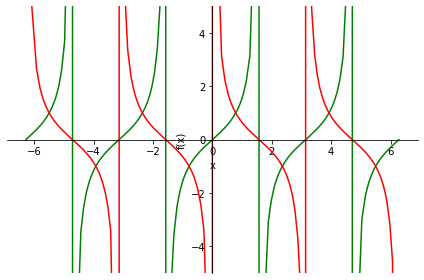

In [11]:
interval_x = (x, -2*pi, 2*pi)
interval_y = (-5, 5)
p = plot(tan(x), 
         interval_x, 
         line_color='green', 
         ylim=interval_y, 
         show=False)
p.append(plot(cot(x), 
              interval_x, 
              line_color='red', 
              ylim=interval_y, 
              show=False)[0])
p.show()

#### Задание 6
Построить графики логарифма по основанию 2, 10, $1/2$ и натурального логарифма в одной плоскости, каждый график отдельным цветом ('red', 'green', 'black', 'pink'). Отобразить название графика "Логарифмы по основанию 2, 10, $1/2$ и $e$", подписать горизонтальную ось $\phi$, вертикальную ось $\log_a\phi$. 
Включить легенду, в ней все функции подписать своими формулами, например, натуральный логарифм $\ln \phi$, десятичный $\lg \phi$.

#### Указание.
Можно составить подходящий словарь, list или tuple и использовать его в plot.
Вначале можно построить только координатную плоскость с надписью графика и подписями осей, а также legend=True, а затем в цикле добавлять с помощью append графики логарифмов разных цветов.

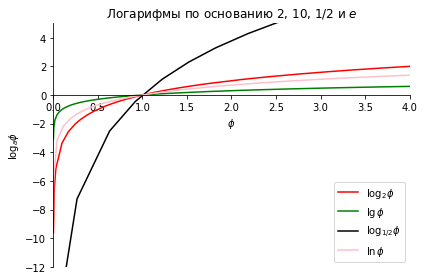

In [13]:
funcs = [log(x,2 ), log(x, 10), log(x, 1.2), log(x)]
labels = ["$\log_2\phi$", "$\lg \phi$", "$\log_{1/2}\phi$", "$\ln \phi$"]
colors = ['red', 'green', 'black', 'pink']
n = len(funcs)
p = plot(title="Логарифмы по основанию 2, 10, $1/2$ и $e$", 
         xlabel="$\phi$", ylabel="$\log_a\phi$", 
         xlim=(0, 4), ylim=(-12,5), 
         legend=True, 
         show=False)
for i in range(0, n):
    p.append(plot(funcs[i], 
                  line_color=colors[i], 
                  label=labels[i],
                  show=False)[0])
p.show()

#### Задание 7
Изобразить на графике гиперболу, заданную своим каноническим уравнением
$$
\frac{x^2}{a^2}-\frac{y^2}{b^2}=1,
$$
при $a=3$, $b=5$. Масштаб по осям одинаковый, рекомендуемый интервал (-10, 10).

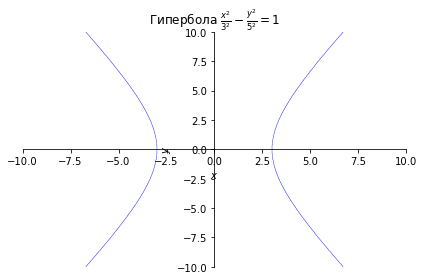

In [14]:
x, y =symbols('x y')
a = 3
b = 5
plot_implicit(Eq(x**2/a**2 - y**2/b**2, 1), 
              (x, -10, 10), 
              (y, -10, 10), 
              #aspect_ratio=(1, 1),
              title="Гипербола $\\frac{x^2}{3^2}-\\frac{y^2}{5^2}=1$", 
              xlabel='$x$', ylabel='$y$')

### Индивидуальное задание (файл Ind_tasks_...)
Построить график параметрически заданной функции с соответствующими уравнениям подписями к осям. 
В легенде отразить уравнения функции в строчку.
$$
{\phi(\theta) = 3 \cos^3 (\theta)}
$$
$$
{\psi(\theta) = 3 \sin^3 (\theta)}
$$

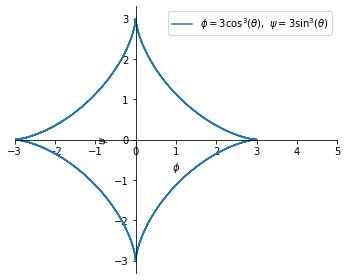

In [15]:
t = Symbol('t')
plot_parametric(3*cos(t)**3, 3*sin(t)**3,
                aspect_ratio=(1, 1), 
                axis_center=(0, 0),
                xlim=(-3, 5),
                xlabel='$\phi$', ylabel='$\psi$', 
                legend=True, label='$\phi = 3 \cos ^3(\\theta),\ \psi = 3 \sin ^3(\\theta)$')